# Цель проекта

Вам предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время. Вы не знаете, по каким критериям ваше руководство будет отбирать рейсы, поэтому решаете собрать как можно больше информации, содержащейся в вашей базе, в один датасет. 
Исходя из того, что прибыльность рейса — это разница между доходом от продаж билетов и расходом на полет, соберите такой датасет, который позволит оценить эти цифры. 

Самая простая модель оценки прибыльности: стоимость билетов - стоимость топлива на рейс (для оценки последнего вам необходим километраж рейса или длительность полета), но вы можете предложить другую модель.



# Ознакомление с данными выведенных из SQL

Мой подготовленный датасет из SQL состоит из:
-   **model** -  модель самолёта 
-   **aircraft_code** - модель самолета идентифицируется своим трёхзначным кодом
-   **range** - максимальная дальность полёта в километрах
-  **all_seats** - количество мест в самолете
-   **occupied_seats** - количество занятых мест пассажирами
-   **occupancy_air** - загруженность самолета пассажирами (occupied_seats/all_seats). 
-   **flight_id** -  суррогатный ключ используется в качестве первичного
-   **sum_amount** - сумма дохода от продаж билетов
-   **scheduled_departure** - время вылета 
-   **scheduled_arrival** - время прилета
-   **departure_airport** (AAQ) - город вылета (Анапа) (Anapa has longitude = 37.35, latitude = 45)
-   **arrival_airport**  - город прилета 
-   **actual_departure** - фактическое время отправления
-   **actual_arriva**l - фактическое время прибытия
-   **time_fly** - время полета
-   **airport_name** - название аэропарта прибытия
-   **city** - город прибытия
-   **longitude** - долгота
-   **latitude** - широта


В этоге мы получили 118 рейсов. Поскольку отсутствуют данные по количеству мест
 и оплаты рейса Анапа - Новокузнецк в зимний период. А значит остальная информация по нему просто бесполезна. Также полностью отсутствует полностью информация всех полетов в декабре.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modul/skillfactory_rds/modul_4/data_118.csv')

In [25]:
data.sample(5)

,model,aircraft_code,range,all_seats,occupied_seats,occupancy_air,flight_id,sum_amount,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,actual_departure,actual_arrival,time_fly,city,airport_name,longitude,latitude,distance,fuel_burn,profit,month,weekdays,lose_km
110,Sukhoi Superjet-100,SU9,3000,97,96,0.989691,136907,759000.0,2017-01-16 09:25:00+00,2017-01-16 10:15:00+00,AAQ,EGO,2017-01-16 09:31:00+00:00,2017-01-16 10:22:00+00,00:51:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,676117.788,1,0,630.11
56,Boeing 737-300,733,4200,130,122,0.938462,136479,1738400.0,2017-02-21 10:05:00+00,2017-02-21 11:45:00+00,AAQ,SVO,2017-02-21 10:08:00+00:00,2017-02-21 11:47:00+00,01:39:00,Moscow,Sheremetyevo International Airport,37.414600,55.972599,1220.11,4258.1839,1539074.412,2,1,9760.88
34,Boeing 737-300,733,4200,130,108,0.830769,136322,1567600.0,2017-02-06 10:05:00+00,2017-02-06 11:45:00+00,AAQ,SVO,2017-02-06 10:11:00+00:00,2017-02-06 11:52:00+00,01:41:00,Moscow,Sheremetyevo International Airport,37.414600,55.972599,1220.11,4258.1839,1368274.412,2,0,26842.42
69,Sukhoi Superjet-100,SU9,3000,97,82,0.845361,136645,633000.0,2017-01-05 09:25:00+00,2017-01-05 10:15:00+00,AAQ,EGO,2017-01-05 09:29:00+00:00,2017-01-05 10:20:00+00,00:51:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,550117.788,1,3,9451.65
72,Sukhoi Superjet-100,SU9,3000,97,87,0.896907,136660,677100.0,2017-02-20 09:25:00+00,2017-02-20 10:15:00+00,AAQ,EGO,2017-02-20 09:26:00+00:00,2017-02-20 10:15:00+00,00:49:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,594217.788,2,0,6301.10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                118 non-null    object 
 1   aircraft_code        118 non-null    object 
 2   range                118 non-null    int64  
 3   all_seats            118 non-null    int64  
 4   occupied_seats       118 non-null    int64  
 5   occupancy_air        118 non-null    float64
 6   flight_id            118 non-null    int64  
 7   sum_amount           118 non-null    float64
 8   scheduled_departure  118 non-null    object 
 9   scheduled_arrival    118 non-null    object 
 10  departure_airport    118 non-null    object 
 11  arrival_airport      118 non-null    object 
 12  actual_departure     118 non-null    object 
 13  actual_arrival       118 non-null    object 
 14  time_fly             118 non-null    object 
 15  city                 118 non-null    obj

Какие самолеты куда летят и по сколько рейсов?

In [38]:
data.groupby(by=['city', 'model']).flight_id.count()

city      model              
Belgorod  Sukhoi Superjet-100    59
Moscow    Boeing 737-300         59
Name: flight_id, dtype: int64

**Создание доп признаков**

Самая простая модель оценки прибыльности: стоимость билетов - стоимость топлива на рейс (для оценки последнего нам необходим километраж рейса)

**считаем расстояние между городами**

Зная широту и долготу аэропортов можем посчитать расстояние между ними.
Для этого используем формулу гаверсинусов. 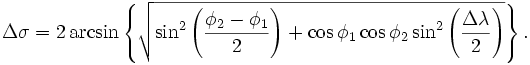


In [6]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) # переводим градусы в радианы.
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return round(c * earth_radius, 2)

data['distance'] = data.apply(lambda row: 
                                      haversine(lon1 = 37.35, 
                                                lat1 = 45,
                                                lon2 = row['longitude'], 
                                                lat2 = row['latitude']), 
                                      axis=1)

**Считаем расход топлива**

Для этого выведем уникальные модели самолетов из данных и добавим расход топлива из внешних источников [Fuel economy in aircraft](https://en.wikipedia.org/wiki/Fuel_economy_in_aircraft#:~:text=The%20most%20fuel%2Defficient%20airline,a%20low%209%25%20premium%20seating.).

In [7]:
data.model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

Boeing 737-300 fuel burn 3.49 kg/km 

Sukhoi Superjet-100 fuel burn 2.81 kg/km

In [8]:
def fuel_burn(aircraft_code, distance):
  B_733 = 3.49
  SU_9 = 2.81
  if aircraft_code == '733':
    return distance*B_733
  return distance*SU_9

data['fuel_burn'] = data.apply(lambda row:
                                 fuel_burn(row['aircraft_code'],
                                           row['distance']), 
                                 axis=1)

Стоимость авиационого керасина:
 на январь 2017: 46.81/литр (c НДС)
 декабрь 2017 года: 53.22/литр (c НДС)
 
 [ЦЕНЫ НА АВИАГСМ В 2017 ГОДУ](https://favt.gov.ru/stat-date-gsm-price/?id=7329)

**Считаем прибыльность рейса**

стоимость билетов(sum_amount) - стоимость топлива на рейс(fuel_burn) 

In [9]:
data.actual_departure = pd.to_datetime(data.actual_departure) # переведем в нужный формат времени

def profit(sum_amount, fuel_burn, actual_departure):
  december =  53.22 # стоимость топлива в декабре 
  jan_feb = 46.81 # стоимость топлива январь, ферваль
  if actual_departure.month == 12:
    return round(sum_amount - fuel_burn*december, 3)
  return round(sum_amount - fuel_burn*jan_feb, 3)

data['profit'] = data.apply(lambda row:
                            profit(row['sum_amount'],
                                   row['fuel_burn'],
                                   row['actual_departure']),
                            axis=1)


In [10]:
data.sample(5)

,model,aircraft_code,range,all_seats,occupied_seats,occupancy_air,flight_id,sum_amount,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,actual_departure,actual_arrival,time_fly,city,airport_name,longitude,latitude,distance,fuel_burn,profit
80,Sukhoi Superjet-100,SU9,3000,97,95,0.979381,136720,752700.0,2017-01-26 09:25:00+00,2017-01-26 10:15:00+00,AAQ,EGO,2017-01-26 09:29:00+00:00,2017-01-26 10:19:00+00,00:50:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,669817.788
63,Sukhoi Superjet-100,SU9,3000,97,81,0.835052,136609,639300.0,2017-01-08 09:25:00+00,2017-01-08 10:15:00+00,AAQ,EGO,2017-01-08 09:28:00+00:00,2017-01-08 10:18:00+00,00:50:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,556417.788
96,Sukhoi Superjet-100,SU9,3000,97,78,0.804124,136823,620400.0,2017-02-05 09:25:00+00,2017-02-05 10:15:00+00,AAQ,EGO,2017-02-05 09:27:00+00:00,2017-02-05 10:18:00+00,00:51:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,537517.788
90,Sukhoi Superjet-100,SU9,3000,97,89,0.917526,136780,714900.0,2017-02-24 09:25:00+00,2017-02-24 10:15:00+00,AAQ,EGO,2017-02-24 09:30:00+00:00,2017-02-24 10:20:00+00,00:50:00,Belgorod,Belgorod International Airport,36.590099,50.643799,630.11,1770.6091,632017.788
21,Boeing 737-300,733,4200,130,99,0.761538,136250,1407800.0,2017-02-08 10:05:00+00,2017-02-08 11:45:00+00,AAQ,SVO,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00,01:41:00,Moscow,Sheremetyevo International Airport,37.414600,55.972599,1220.11,4258.1839,1208474.412


**Строим графики**

'На графике видно, что рейсы на Белгород менее выгодные. На сколько именно? Давайте посчитаем!'

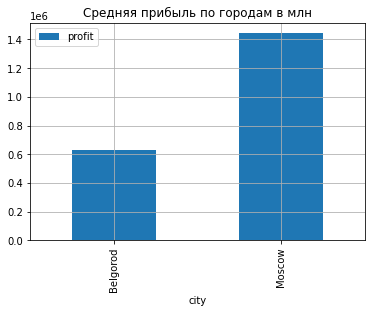

In [11]:
data.pivot_table(values='profit', index='city', aggfunc='mean').plot(kind='bar', grid=True, title='Средняя прибыль по городам в млн')

На графике видно, что рейсы на Белгород менее выгодные. На сколько именно? Давайте посчитаем!

In [12]:
data.groupby(by='city')['profit'].mean()

city
Belgorod    6.275534e+05
Moscow      1.443251e+06
Name: profit, dtype: float64

In [13]:
m = data[data['city'] == 'Moscow'].groupby(by='city')['profit'].mean().values[0]
b =   data[data['city'] == 'Belgorod'].groupby(by='city')['profit'].mean().values[0]
mean_profit = (m + b)/2
excell_profit = (m / b)
print(f'Средняя прибыль рейса на Москву состовляет {round(m/1000000, 3)} млн.рублей', 
      f'\nСредняя прибыль на Белгород состовляет {round(b/1000000, 3)} млн.рублей', 
      f'\nСредняя прибыль всех рейсов {round(mean_profit/1000000, 3)} млн.рублей',
      f'\nВ {round(excell_profit, 2)}, полеты в Белгород менее выгодные')

Средняя прибыль рейса на Москву состовляет 1.443 млн.рублей 
Средняя прибыль на Белгород состовляет 0.628 млн.рублей 
Средняя прибыль всех рейсов 1.035 млн.рублей 
В 2.3, полеты в Белгород менее выгодные


А какие месяцы для полетов наменее выгодные для комании? Давайте отследим.

'Виден спад в феврале месяце, а декабря у нас и вовсе нет.'

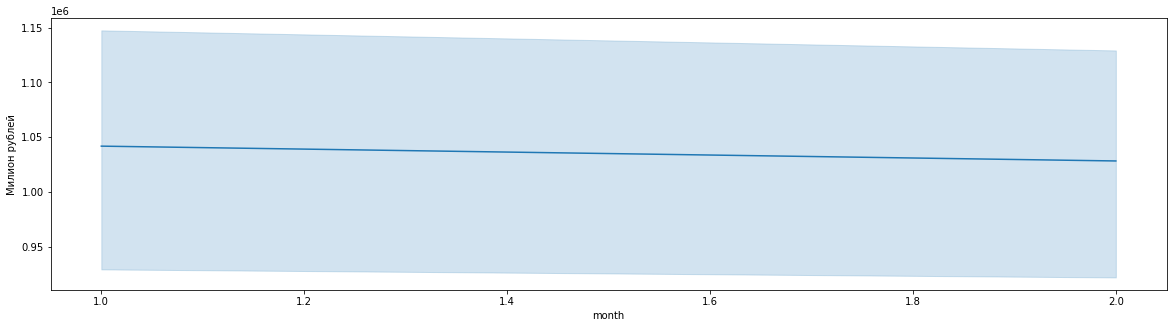

In [14]:
data['month'] = data.actual_departure.dt.month 
plt.figure(figsize=[20, 5])
sns.lineplot(x='month', y='profit', data=data)
plt.ylabel('Милион рублей')
"""Виден спад в феврале месяце, а декабря у нас и вовсе нет."""

А что там по дням недели?

'На графике 0 индекс означает понедельник. Видно, что воскреснье идет спад.'

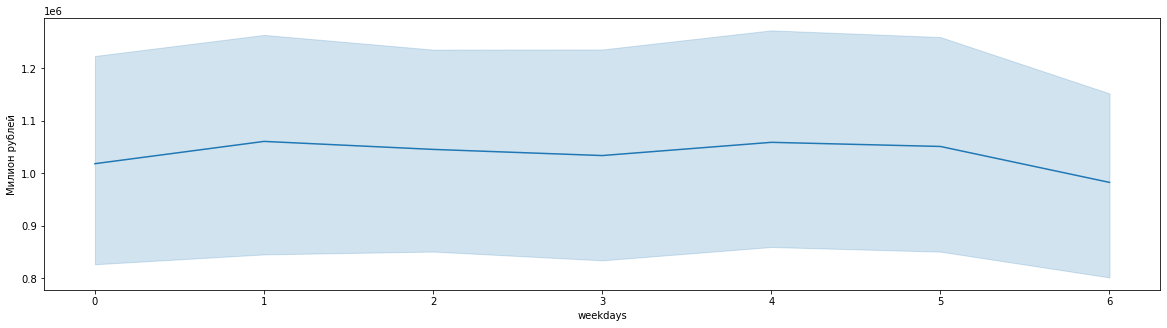

In [15]:
data['weekdays'] = data.actual_departure.dt.weekday 
plt.figure(figsize=[20, 5])
sns.lineplot(x='weekdays', y='profit', data=data)
plt.ylabel('Милион рублей')
"""На графике 0 индекс означает понедельник. Видно, что воскреснье идет спад."""

Зная дистанцию и загруженность самолета пассажирами мы можем посчитать километры в пустых мест.

In [16]:
def km_free(all_seats, occupied_seats, distance):
  return round((all_seats-occupied_seats)*distance, 2)

data['lose_km'] = data.apply(lambda row:
           km_free(row['all_seats'],
                   row['occupied_seats'],
           row['distance']),
           axis=1)

In [26]:
data.groupby(by='city')['lose_km'].mean()

city
Belgorod     4293.291864
Moscow      20597.111186
Name: lose_km, dtype: float64

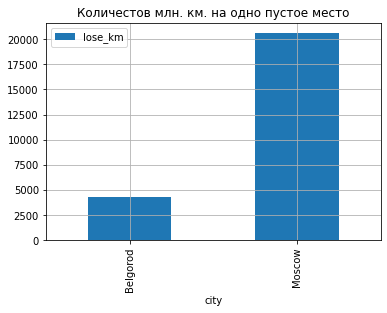

In [30]:
data.pivot_table(values='lose_km',
                 index='city', aggfunc='mean').plot(kind='bar', 
                grid=True, title='Количестов млн. км. на одно пустое место')

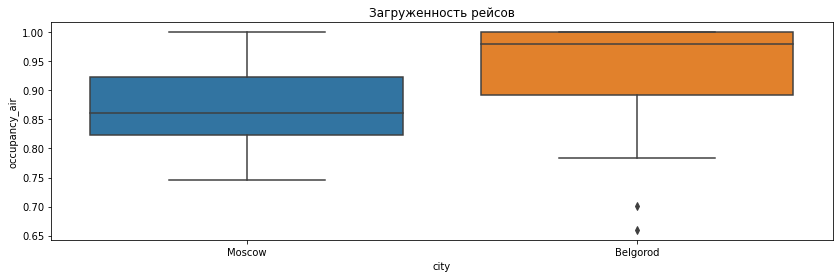

In [28]:
 fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x='city', y='occupancy_air',
                data=data,
                ax=ax)
plt.xticks(rotation=0)
ax.set_title('Загруженность рейсов')
plt.show()

**Вывод:**

 - Средняя прибыль рейса на Москву состовляет 1.443 млн.рублей 

- Средняя прибыль на Белгород состовляет 0.628 млн.рублей 

- Средняя прибыль всех рейсов 1.035 млн.рублей 

- В 2.3, полеты в Белгород менее выгодные

**Заключение**
В ходе исследования данных мы выяснили, что в зимний период у нас были рейсы по 3-м городам (Москва, Белгород, Новокузнецк). По скольку у нас отсутствовали данные по г. Новокузнецк - мы его исключили. Также нет данных о полетах за декабрь месяц.
Зная долготу и широту мы нашли расстояние между городами. 
Зная дистанцию - посчитали примерный расход толива на рейс, но можно было использовать вместо дистанции и время полета. 
Мы знаем что в Белгород летают только самолеты Sukhoi Superjet-100 (59 рейсов)
Москва - Boeing 737-300 (59 рейсов).
И поскольку это разные самолеты - мы не можем сказать точно какой рейс выгоднее, т.к. мы не знаем сколько обходится в обслуживании каждый из этих самолетов.
